<a href="https://colab.research.google.com/github/PinpingC/Python_-/blob/main/%E5%BE%9E%E7%B0%A1%E6%98%93%E6%93%8D%E4%BD%9C%E5%88%B0_%E5%AF%A6%E9%9A%9B%E6%87%89%E7%94%A8_COVID_19%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 簡易操作與分析

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
boston = datasets.load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
df = pd.DataFrame(data=np.c_[boston['data'], boston['target']], columns=list(boston['feature_names']) + ['PRICE'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
# 檢查缺失值
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


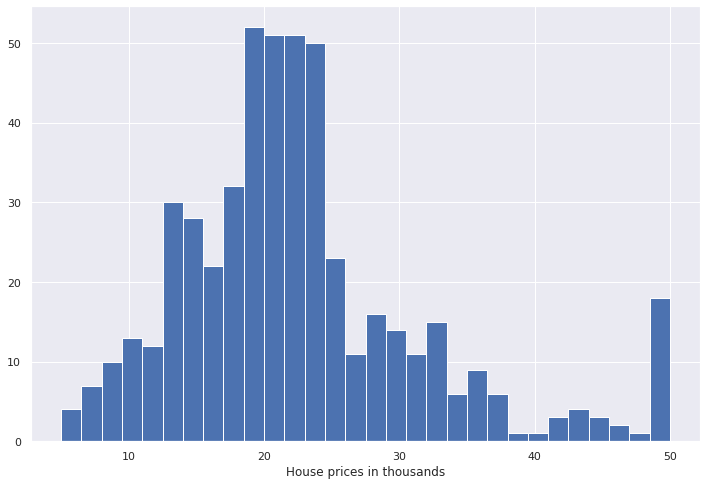

In [ ]:
sns.set(rc={'figure.figsize':(12,8)}) 
plt.hist(df['PRICE'], bins=30) 
plt.xlabel("House prices in thousands") 
plt.show()

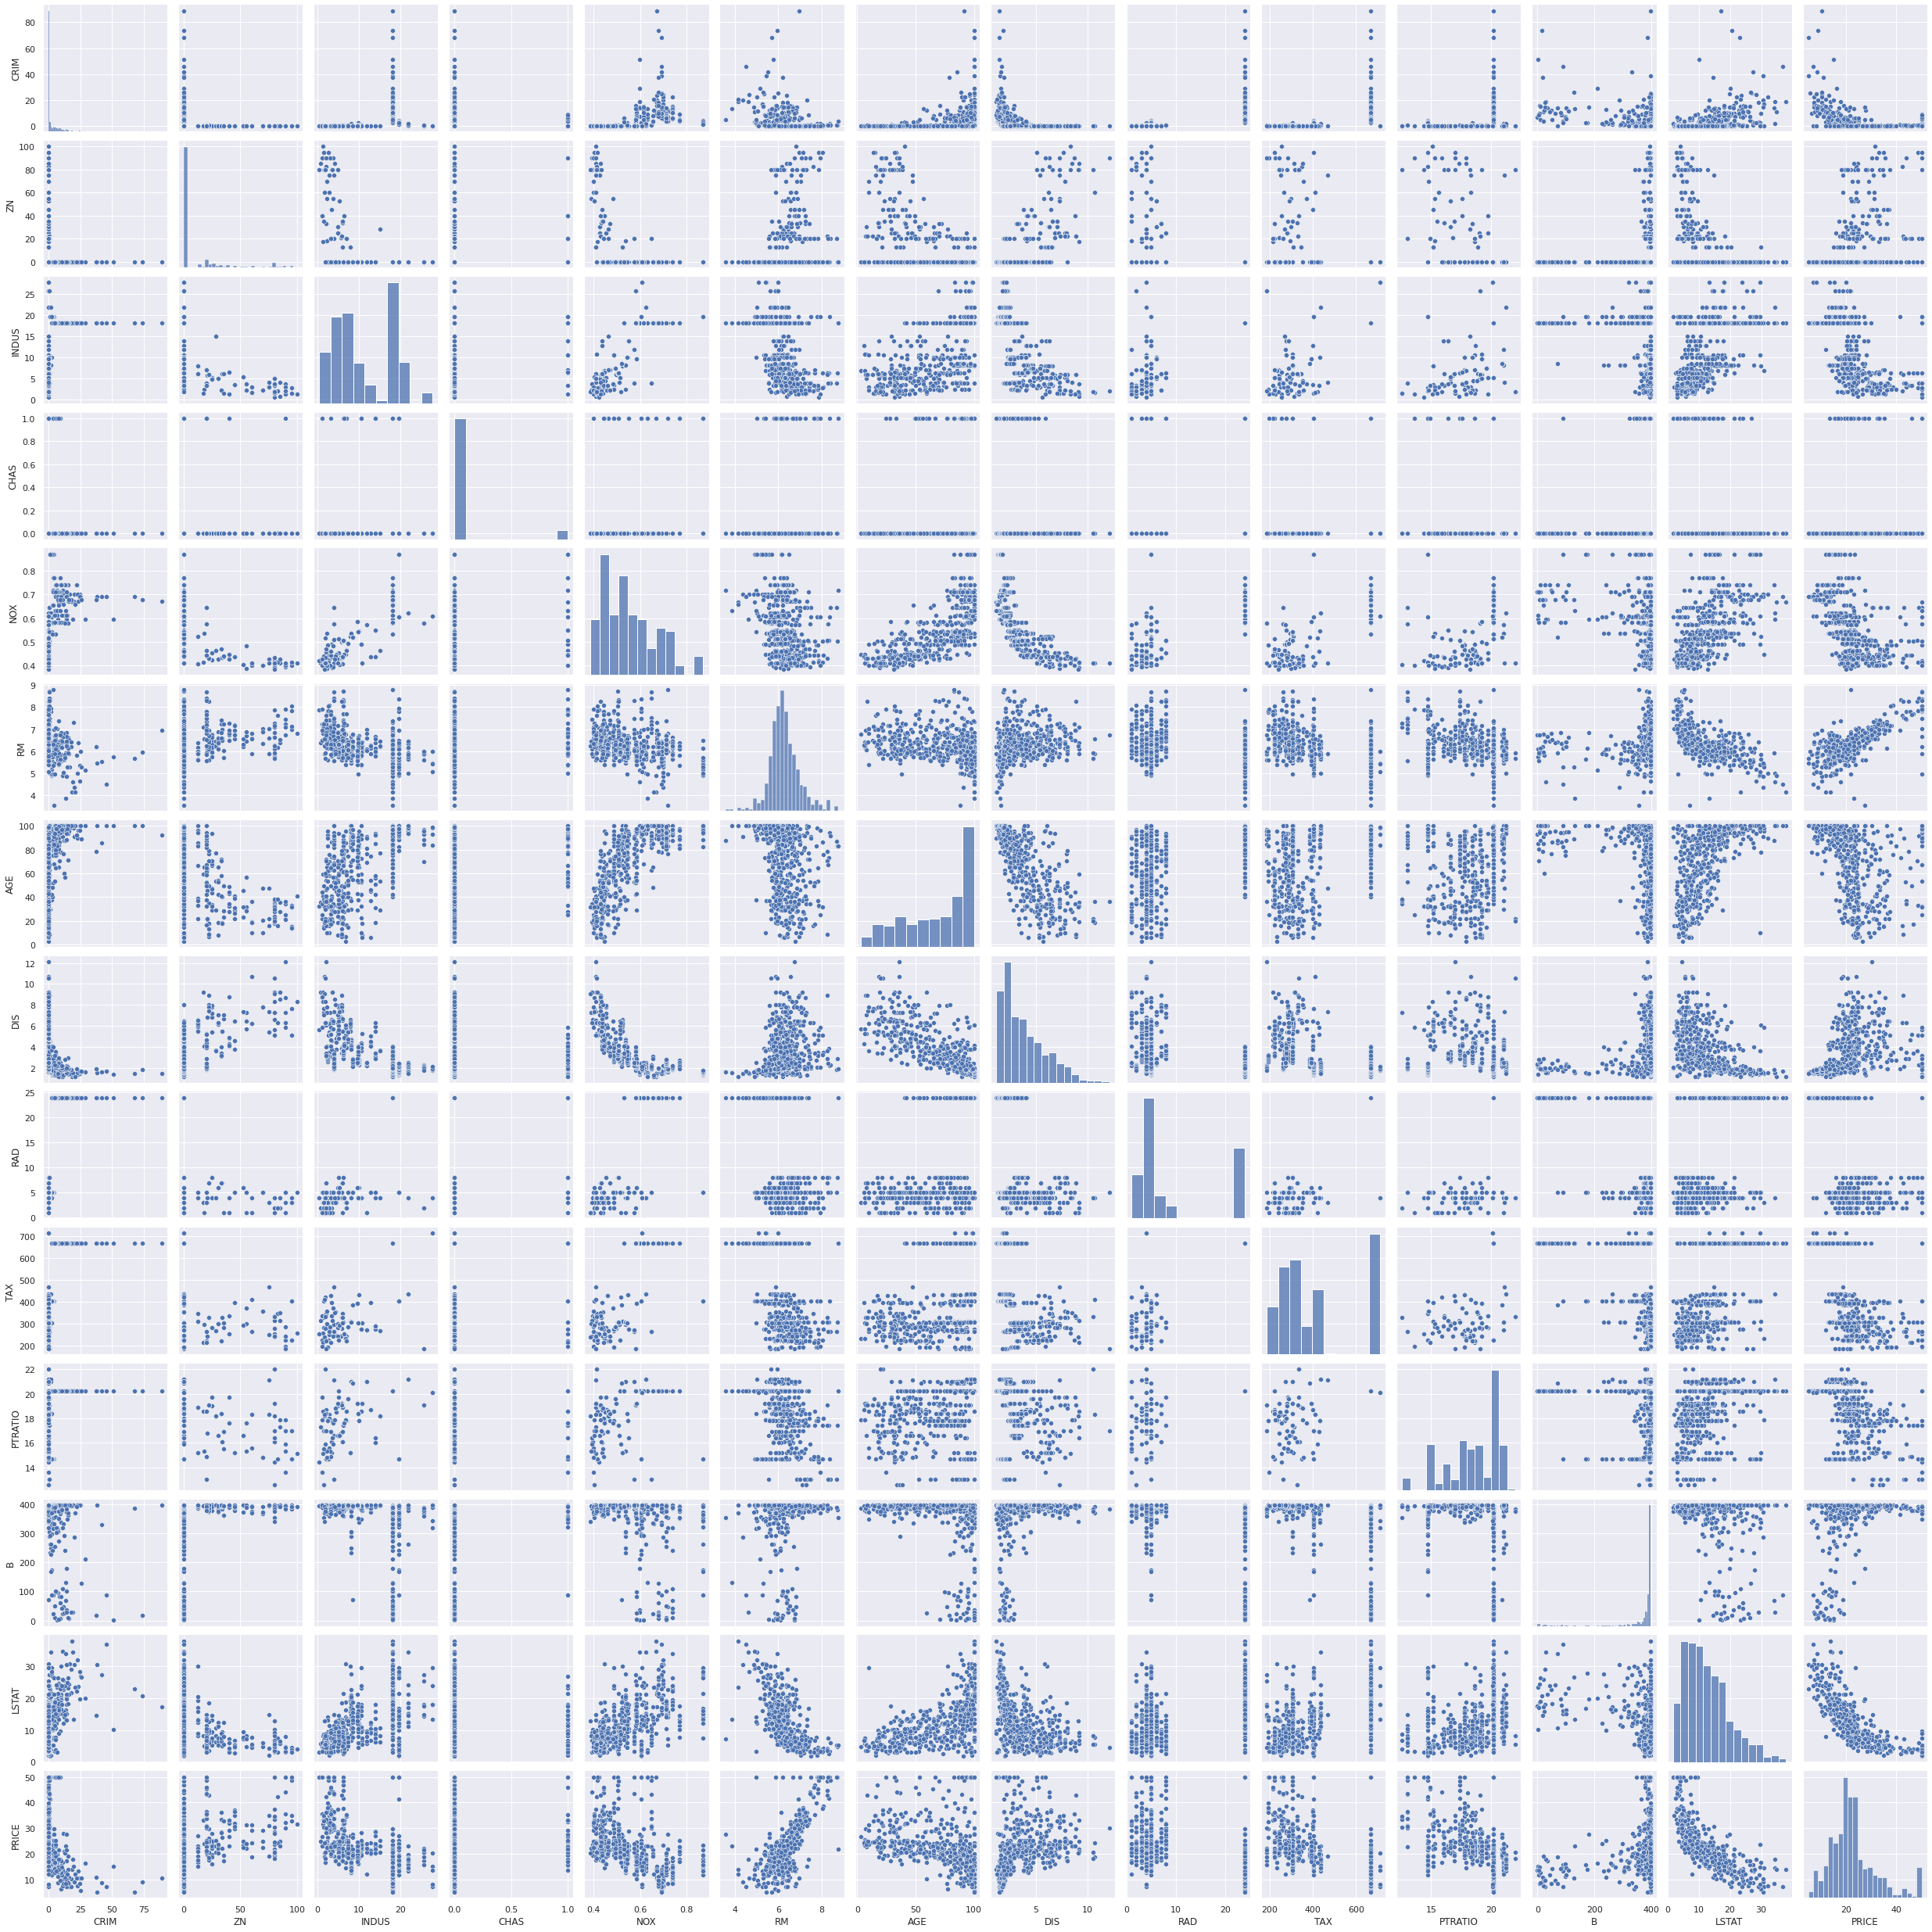

In [ ]:
sns.pairplot(df)

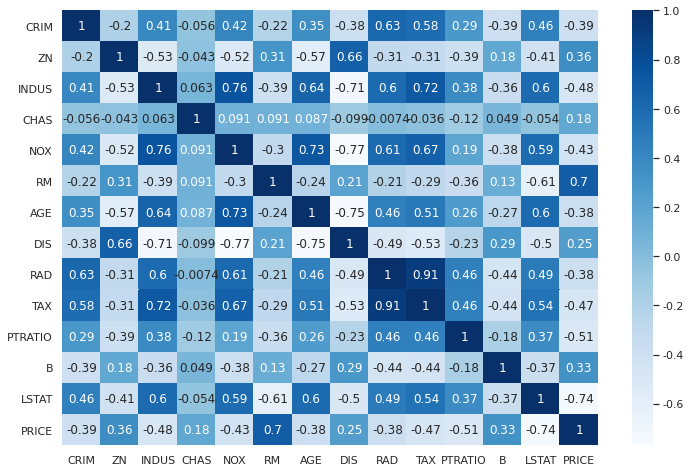

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, cmap='Blues', annot=True)

# 簡易藉由套件獲取股票資訊

In [ ]:
pip install twstock # 套件安裝

     |████████████████████████████████| 1.9MB 3.3MB/s 


In [ ]:
import twstock
from twstock import Stock

In [ ]:
# 抓取 31 天內的資料，可用 Stock()
stock = Stock('2337')                             # 擷取股價 2337 可修改
ma_p = stock.moving_average(stock.price, 5)       # 計算五日均價
ma_c = stock.moving_average(stock.capacity, 5)    # 計算五日均量
ma_p_cont = stock.continuous(ma_p)                # 計算五日均價持續天數
ma_br = stock.ma_bias_ratio(5, 10)                # 計算五日、十日乖離值

# 印出結果
print("五日均價:",ma_p)
print("五日均量:",ma_c)
print("五日均價持續天數:",ma_p_cont)
print("五日、十日乖離值:",ma_br)

五日均價: [32.05, 31.75, 31.24, 30.56, 30.6, 30.76, 30.97, 31.26, 31.72, 31.71, 31.67, 31.59, 31.63, 31.68, 31.59, 31.46, 31.49, 31.54, 31.59, 31.67, 32.02, 32.48, 32.72, 33.01, 33.25, 33.07, 32.55]
五日均量: [25027965.0, 18194118.0, 19976674.4, 23606030.4, 37206095.8, 46495805.8, 48051449.0, 50150739.2, 46647399.4, 35297722.6, 29595157.2, 30293885.6, 26007041.4, 26152145.2, 21541502.2, 17407233.6, 14712209.6, 16013497.8, 15973711.6, 16597074.4, 35911703.6, 61650852.6, 121907409.6, 135223132.8, 141619821.2, 128498870.6, 105918181.0]
五日均價持續天數: -2
五日、十日乖離值: [-0.6499999999999986, -0.39000000000000057, 0.010000000000001563, 0.5799999999999983, 0.5600000000000023, 0.46000000000000085, 0.3099999999999987, 0.17999999999999972, -0.019999999999999574, -0.05999999999999872, -0.10999999999999943, -0.05000000000000071, -0.05000000000000071, -0.05000000000000071, 0.0400000000000027, 0.2800000000000047, 0.49999999999999645, 0.5899999999999963, 0.7100000000000009, 0.7899999999999991, 0.5200000000000031, 0.02

In [ ]:
stock.price

[32.4,
 32.45,
 32.45,
 31.75,
 31.2,
 30.9,
 29.9,
 29.05,
 31.95,
 32.0,
 31.95,
 31.35,
 31.35,
 31.9,
 31.8,
 31.55,
 31.55,
 31.6,
 31.45,
 31.15,
 31.7,
 31.8,
 31.85,
 31.85,
 32.9,
 34.0,
 33.0,
 33.3,
 33.05,
 32.0,
 31.4]

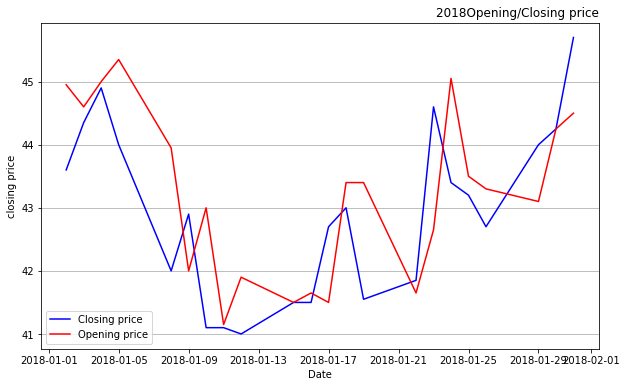

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# 超過 31 天的歷史資料，可用 fetch() 獲取
year = 2018
month = 1
stock_year = stock.fetch(year,month)              # 獲取 year 年 month 月至今日之股票資料
stock_pd = pd.DataFrame(stock_year)               # 轉為 dataframe 型態
stock_pd = stock_pd.set_index('date')             # 將 dtaframe 的 index 設為 date

# 解決 matplotlib 繪圖中文無法呈現問題
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False

# 繪圖
fig = plt.figure(figsize=(10, 6))
plt.plot(stock_pd.close, '-b' , label="Closing price")
plt.plot(stock_pd.open, '-r' , label="Opening price")
plt.title(str(year)+'Opening/Closing price',loc='right')
plt.xlabel('Date')#, fontproperties=zhfont)
plt.ylabel('closing price')#, fontproperties=zhfont)
plt.grid(True, axis='y')
plt.legend()
# fig.savefig('開盤/收盤價曲線.png')

In [ ]:
# 抓取股票即時資料
twstock.realtime.get(['2330', '2337', '2409']) 
twstock.realtime.get('6207') 

{'info': {'channel': '6207.tw',
  'code': '6207',
  'fullname': '雷科股份有限公司',
  'name': '雷科',
  'time': '2020-11-02 06:30:00'},
 'realtime': {'accumulate_trade_volume': '73',
  'best_ask_price': ['23.8000', '23.8500', '23.9000', '24.0000', '24.0500'],
  'best_ask_volume': ['3', '8', '1', '3', '2'],
  'best_bid_price': ['23.7000', '23.6500', '23.6000', '23.5500', '23.5000'],
  'best_bid_volume': ['1', '29', '23', '32', '28'],
  'high': '23.8500',
  'latest_trade_price': '23.7000',
  'low': '23.6500',
  'open': '23.7000',
  'trade_volume': '2'},
 'success': True,
 'timestamp': 1604298600.0}

In [ ]:
# 抓取 31 天內的資料，可用 Stock()
stock = Stock('6207')                             # 擷取股價
ma_p = stock.moving_average(stock.price, 5)       # 計算五日均價
ma_c = stock.moving_average(stock.capacity, 5)    # 計算五日均量
ma_p_cont = stock.continuous(ma_p)                # 計算五日均價持續天數
ma_br = stock.ma_bias_ratio(5, 10)                # 計算五日、十日乖離值

# 印出結果
print("五日均價:",ma_p)
print("五日均量:",ma_c)
print("五日均價持續天數:",ma_p_cont)
print("五日、十日乖離值:",ma_br)

五日均價: [25.24, 25.2, 24.97, 24.61, 24.23, 23.89, 23.6, 23.44, 23.49, 23.56, 23.73, 23.86, 24.0, 24.12, 24.22, 24.2, 24.21, 24.22, 24.24, 24.28, 24.3, 24.3, 24.28, 24.17, 24.04, 23.92, 23.82]
五日均量: [281600.0, 250000.0, 286400.0, 292400.0, 277600.0, 244200.0, 203800.0, 142800.0, 82800.0, 67400.0, 108800.0, 127000.0, 144200.0, 148800.0, 160000.0, 130000.0, 119400.0, 109200.0, 113400.0, 106200.0, 89600.0, 87800.0, 87400.0, 83600.0, 93200.0, 99000.0, 98000.0]
五日均價持續天數: -6
五日、十日乖離值: [-0.6699999999999982, -0.7999999999999972, -0.759999999999998, -0.5600000000000023, -0.33000000000000185, -0.0799999999999983, 0.129999999999999, 0.28000000000000114, 0.3200000000000003, 0.3299999999999983, 0.23999999999999844, 0.17999999999999972, 0.10999999999999943, 0.05999999999999872, 0.030000000000001137, 0.05000000000000071, 0.03999999999999915, 0.030000000000001137, -0.03999999999999915, -0.120000000000001, -0.18999999999999773, -0.23999999999999844]


In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as datetime

In [ ]:
start = datetime.datetime(2015,1,5)
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start)
df_2492 = pdr.DataReader('2492.TW', 'yahoo', start=start)

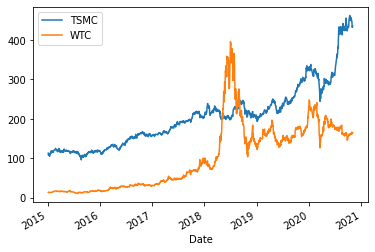

In [ ]:
# 比較收盤價
fig = plt.figure()
df_2330['Adj Close'].plot(label="TSMC") #台積電
df_2492['Adj Close'].plot(label="WTC") #華新科
plt.legend()

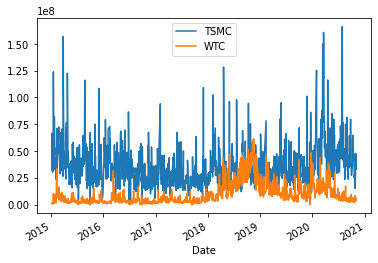

In [ ]:
# 比較交易量
fig = plt.figure()
df_2330['Volume'].plot(label="TSMC")
df_2492['Volume'].plot(label="WTC")
plt.legend()

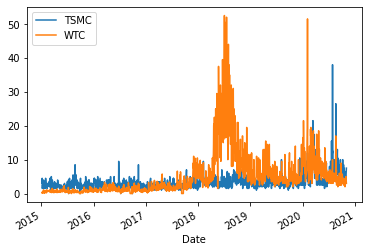

In [ ]:
# 比較波動差異
df_2330['High-Low'] = df_2330['High'] - df_2330['Low']
df_2492['High-Low'] = df_2492['High'] - df_2492['Low']

fig = plt.figure()
df_2330['High-Low'].plot(label="TSMC")
df_2492['High-Low'].plot(label="WTC")
plt.legend()

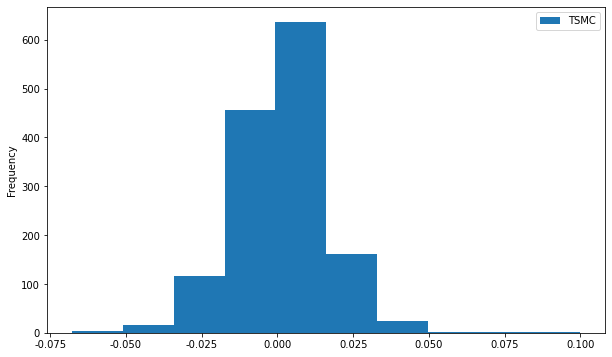

In [ ]:
# 台積電收益率
# 收益率：代表股票在一天交易中的價值變化百分比
plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(figsize=(10, 6))
df_2330['daily-return'] = df_2330['Adj Close'].pct_change()
df_2330['daily-return'].plot(label="TSMC", kind='hist')
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


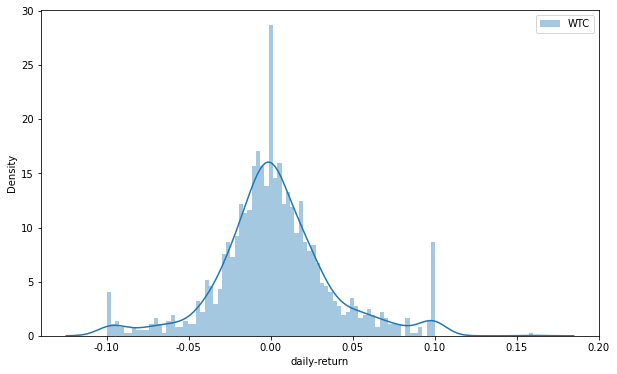

In [ ]:
# 華新科收益率
# 收益率：代表股票在一天交易中的價值變化百分比
fig = plt.figure(figsize=(10, 6))
df_2492['daily-return'] = df_2492['Adj Close'].pct_change()
sns.distplot(df_2492['daily-return'].dropna(),bins=100, label="WTC")
plt.legend()

In [ ]:
# 獲取多個公司股票資訊
# 2492：華新科
# 2330：台積電
# 3045：台灣大
# 2412：中華電
# 2409：友達
start = datetime.datetime(2015,1,5)
campany = ['2492.TW', '2330.TW', '3045.TW', '2412.TW', '2409.TW']
df_stock = pdr.DataReader(campany, 'yahoo', start=start)

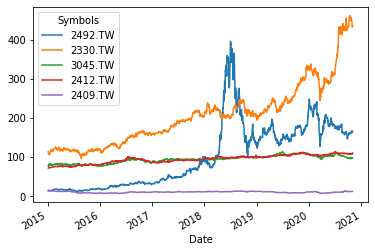

In [ ]:
# 劃出所有股票的收盤價，用以比較
adjClose = df_stock['Adj Close']
adjClose.plot()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


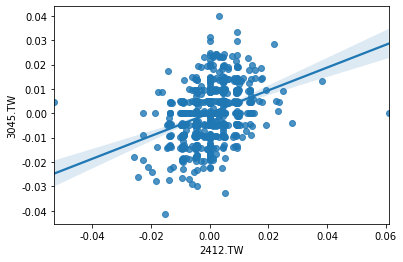

In [ ]:
# 線性回歸分析，以了解兩股票的關係
adjClose_pct = adjClose.pct_change()
sns.regplot('2412.TW','3045.TW',adjClose_pct)
# 中華電 與 台灣大 為正相關

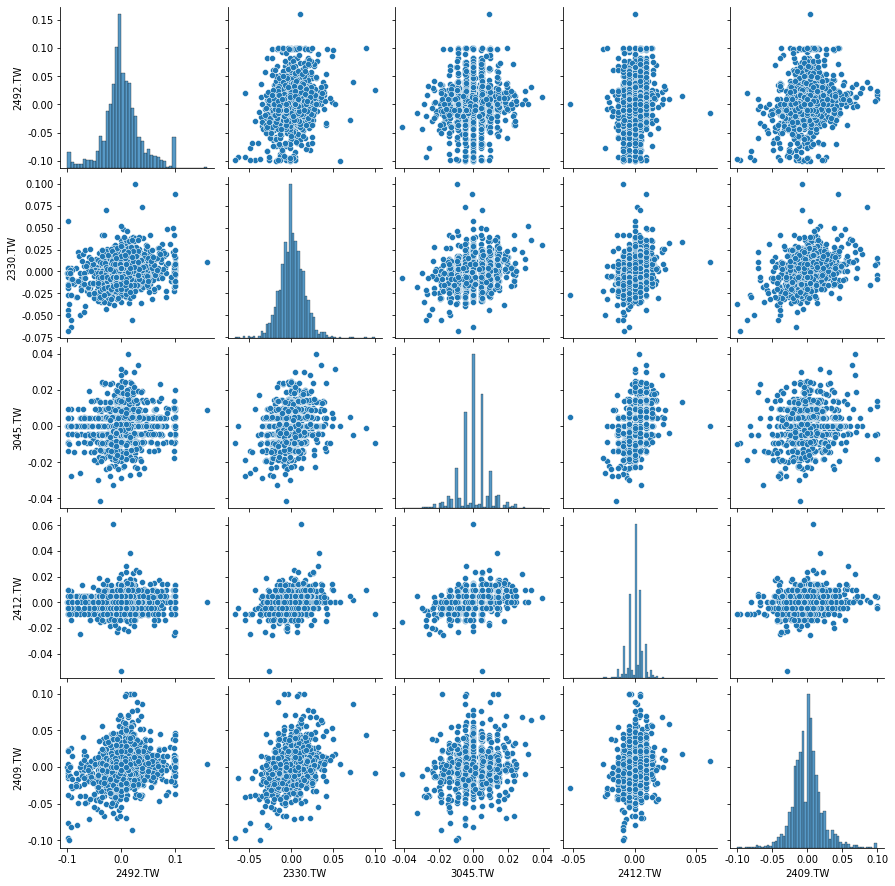

In [ ]:
# 比較五家公司
sns.pairplot(adjClose_pct.dropna())

# COVID-19

## 中文顯示問題

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.6/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

--2020-11-02 07:19:29--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.1.100, 142.250.1.138, 142.250.1.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.1.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8u4rgraq87t3mmqpfa79ijthbakhiksn/1604301525000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2020-11-02 07:19:30--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8u4rgraq87t3mmqpfa79ijthbakhiksn/1604301525000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.125.201

## import 套件

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#可以製作互動式圖表的套件
# import plotly.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import iplot,init_notebook_mode
%matplotlib inline
# #為可以將pandas和plotly結合的套件
# import cufflinks
# cufflinks.go_offline(connected=True)
# init_notebook_mode(connected=True)
# #放我們的進度條以掌握資料處理進度
# import os

## 資料上傳與處理
- Open data : https://data.gov.tw/dataset/120711
- Apple data: https://covid19.apple.com/mobility


In [ ]:
from google.colab import files
dataframe = files.upload()

In [ ]:
#確診資料
df = pd.read_csv('Day_Confirmation_Age_County_Gender_19CoV.csv')

#Iphone data
apple_df = pd.read_csv('applemobilitytrends-2020-10-30.csv')

display(apple_df.head(3))
# 將中文 column 轉英文
df.columns = [
    "Disease_name",
    "Date",
    "Country",
    "gender",
    "ImportOrNot",
    "Age_range",
    "CountOfConfirmed",
]
df.tail(3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,...,126.60,128.29,122.76,118.41,122.77,117.15,123.03,117.30,116.38,119.24,118.79,130.25,148.03,136.67,123.11,117.50,119.25,113.17,126.39,144.47,148.87,123.94,111.80,113.31,111.52,117.39,128.99,137.88,114.93,112.42,115.57,113.05,118.95,126.12,132.18,130.38,120.18,115.54,114.57,128.96
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,...,158.68,149.81,146.82,138.76,148.06,124.99,115.65,144.95,160.09,159.83,154.84,159.32,166.40,130.23,168.27,140.04,154.46,153.60,157.14,167.16,142.52,150.36,141.02,155.39,134.41,142.26,142.22,125.67,149.77,139.79,156.89,134.75,136.38,138.34,133.82,169.04,158.21,149.55,155.01,159.23
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,...,59.23,60.17,62.01,62.72,68.81,64.62,38.49,54.62,59.16,60.03,61.63,74.42,71.69,38.69,55.99,59.95,62.76,65.86,79.00,79.72,49.19,49.69,61.16,65.26,68.45,84.94,88.93,48.76,52.73,55.55,60.31,58.52,78.61,80.43,37.91,60.02,62.89,60.59,70.70,83.31


,Disease_name,Date,Country,gender,ImportOrNot,Age_range,CountOfConfirmed
520,嚴重特殊傳染性肺炎,2020/10/29,空值,女,是,60-64,1
521,嚴重特殊傳染性肺炎,2020/10/30,空值,男,是,35-39,1
522,嚴重特殊傳染性肺炎,2020/10/31,空值,男,是,60-64,1


## Open Data - 病例處理

In [ ]:
display(df.info())

colors = sns.color_palette()
#將個案研判日的data type轉為datetime
df.Date = pd.to_datetime(df.Date)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Disease_name      523 non-null    object
 1   Date              523 non-null    object
 2   Country           523 non-null    object
 3   gender            523 non-null    object
 4   ImportOrNot       523 non-null    object
 5   Age_range         523 non-null    object
 6   CountOfConfirmed  523 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.7+ KB


None

In [ ]:
df['Date']

0     2020-01-22
1     2020-01-24
2     2020-01-24
3     2020-01-26
4     2020-01-27
         ...    
518   2020-10-29
519   2020-10-29
520   2020-10-29
521   2020-10-30
522   2020-10-31
Name: Date, Length: 523, dtype: datetime64[ns]

### 病例數與走勢

count    141.000000
mean       3.936170
std        5.459216
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       26.000000
Name: CountOfConfirmed, dtype: float64

Text(0.5, 1.0, 'Confirmed Case distribution with time')

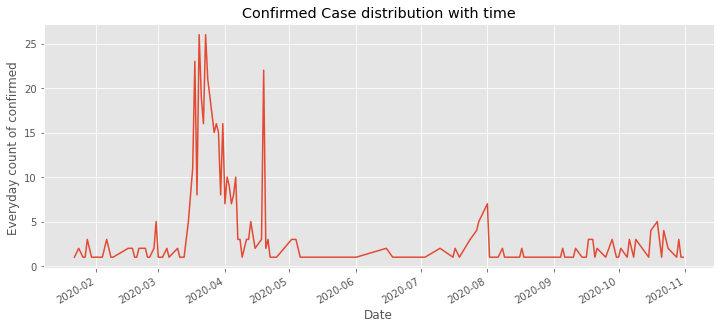

In [ ]:
plt.style.use('ggplot')

#呈現病例數
display(df.groupby('Date')['CountOfConfirmed'].sum().describe())

#疫情確診走勢
plt.figure(figsize = (12,5))
df.groupby('Date')['CountOfConfirmed'].sum().plot()
plt.ylabel('Everyday count of confirmed ')
#plt.ylabel('Everyday count of confirmed ',fontproperties=myfont)
plt.title('Confirmed Case distribution with time')

Text(0.5, 1.0, 'Cumulative confirmed case')

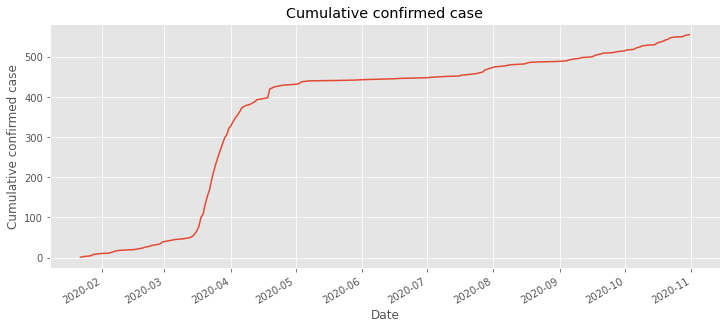

In [ ]:
#累積疫情確診走勢
plt.figure(figsize = (12,5))
# plot(color[1]) blue
df.groupby('Date')['CountOfConfirmed'].sum().cumsum().plot()
plt.ylabel('Cumulative confirmed case')
plt.title('Cumulative confirmed case')

## Apple Data


Apple 之前釋出了 Apple maps 的資料，是一套由蘋果公司研發的電子地圖服務，也是macOS、iOS以及watchOS系統中預設的地圖服務軟體。手機可以追得到你的定位，所以收集了開車、走路、搭乘大眾交通運輸工具等資料，我認為這個資料可以作為**代理變數**來解釋人們是否減少外出、呈現社交距離的資料，檢測**social distance**與疫情的關係。另外細粒度到城市，所以也可以分別看看不同城市的政策效果，我們來看看政策發布日期之後社交距離與案例判斷的關係，藉此查看政策對這些變數的影響效果。

In [ ]:
#我們先看看raw data的樣子
print('整形前')
display(apple_df.head(3))
print('-'*100)


#先找出臺灣的資料
tw_apple_df = apple_df.query('region == "Taiwan"')

#然後轉過來XD，用T就是transfrom~ 並且從第6個開始才是日期，所以擷取出來
tw_apple_df = tw_apple_df.T.iloc[6:,:]

#幫columns標上欄位名稱（header）
tw_apple_df.columns = ['driving' , 'transit' , 'walking']

#印出來
print('整形後')
tw_apple_df.head()

整形前


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23,2020-10-24,2020-10-25,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,...,126.60,128.29,122.76,118.41,122.77,117.15,123.03,117.30,116.38,119.24,118.79,130.25,148.03,136.67,123.11,117.50,119.25,113.17,126.39,144.47,148.87,123.94,111.80,113.31,111.52,117.39,128.99,137.88,114.93,112.42,115.57,113.05,118.95,126.12,132.18,130.38,120.18,115.54,114.57,128.96
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,...,158.68,149.81,146.82,138.76,148.06,124.99,115.65,144.95,160.09,159.83,154.84,159.32,166.40,130.23,168.27,140.04,154.46,153.60,157.14,167.16,142.52,150.36,141.02,155.39,134.41,142.26,142.22,125.67,149.77,139.79,156.89,134.75,136.38,138.34,133.82,169.04,158.21,149.55,155.01,159.23
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,...,59.23,60.17,62.01,62.72,68.81,64.62,38.49,54.62,59.16,60.03,61.63,74.42,71.69,38.69,55.99,59.95,62.76,65.86,79.00,79.72,49.19,49.69,61.16,65.26,68.45,84.94,88.93,48.76,52.73,55.55,60.31,58.52,78.61,80.43,37.91,60.02,62.89,60.59,70.70,83.31


----------------------------------------------------------------------------------------------------
整形後


,driving,transit,walking
2020-01-13,100,100,100
2020-01-14,106.97,107.64,107.89
2020-01-15,113.81,119.93,118.61
2020-01-16,118.64,124.1,119.74
2020-01-17,136.4,135.24,136.24


In [ ]:
#將index(date)的格式轉換為日期，不然mapping會都是nan!
#tw_apple_df = tw_apple_df.drop(['alternative_name','sub-region','country'])
#tw_apple_df.head(5)
tw_apple_df.index = pd.to_datetime(tw_apple_df.index)

print(tw_apple_df.tail())
#統計出累積確診人數
cumsum_confirmed_case = df.groupby('Date')['CountOfConfirmed'].sum().cumsum()

print(cumsum_confirmed_case)
all_df = tw_apple_df.copy()
#透過map(映射)將apple , 確診資料合併在一起
all_df['cumsum_case'] = tw_apple_df.index.map(cumsum_confirmed_case)

#看看資料表現在的樣子
display(all_df.describe())
all_df.tail()

           driving transit walking
2020-10-26   95.15   67.44   95.26
2020-10-27   94.31    70.3   95.55
2020-10-28   92.57   67.05   94.08
2020-10-29   98.55   73.93   100.3
2020-10-30  128.35  110.68  144.89
Date
2020-01-22      1
2020-01-24      3
2020-01-26      4
2020-01-27      5
2020-01-28      8
             ... 
2020-10-24    549
2020-10-28    550
2020-10-29    553
2020-10-30    554
2020-10-31    555
Name: CountOfConfirmed, Length: 141, dtype: int64


,cumsum_case
count,140.000000
mean,328.592857
std,197.451894
min,1.000000
25%,74.250000
50%,427.500000
75%,488.250000
max,554.000000


,driving,transit,walking,cumsum_case
2020-10-26,95.15,67.44,95.26,NaN
2020-10-27,94.31,70.3,95.55,NaN
2020-10-28,92.57,67.05,94.08,550.0
2020-10-29,98.55,73.93,100.3,553.0
2020-10-30,128.35,110.68,144.89,554.0


好的，接下來我們想來看看以下兩個政策跟疫情的關係：

### 3/1居家檢疫隔離服務 : 落實檢疫，會減少人的移動距離嗎？
此政策想要解決的問題是有些居家檢疫或者隔離者偷跑，或是遇到一些生活上的不便，但是不好向外求助的問題。 居家檢疫隔離服務理論上會大幅減少人民外出、並且整合地方與中央政府，我們來看看政策的說明：

此政策可以確保民眾於居家檢疫及居家隔離期間能獲得各項生活、心理及就醫支持，鼓勵配合防疫措施的民眾落實居家檢疫及居家隔離作業，降低民眾對居家檢疫及隔離對象的對立，提升全民防疫信心。

重點綱要包括對象關懷、就醫協助、交通安排、生活支持及專線服務等，並於三月一日開始運作。



In [ ]:
split_df = all_df[(all_df.index >= '2020-01-20') & (all_df.index <= '2020-04-30')]
split_df.tail(10)

,driving,transit,walking,cumsum_case
2020-04-21,74.71,46.98,66.9,425.0
2020-04-22,75.42,48.34,67.3,426.0
2020-04-23,76.23,48.84,67.45,427.0
2020-04-24,96.47,64.15,92.28,428.0
2020-04-25,98.3,58.8,92.77,429.0
2020-04-26,85.1,50.85,73.48,NaN
2020-04-27,78.86,50.26,70.49,NaN
2020-04-28,82.17,51.77,71.86,NaN
2020-04-29,85.96,54.48,75.29,NaN
2020-04-30,108.03,62.26,89.92,NaN


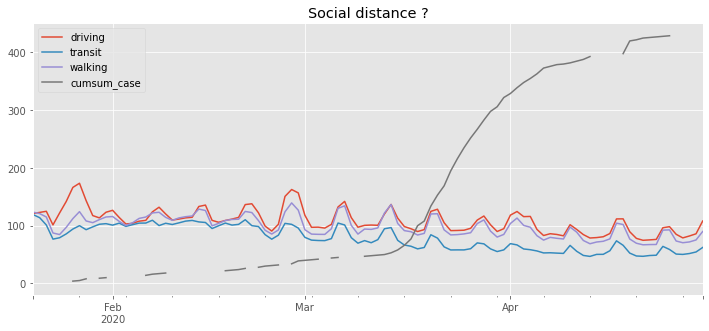

In [ ]:
split_df.plot(figsize = (12,5) , title= 'Social distance ?' )

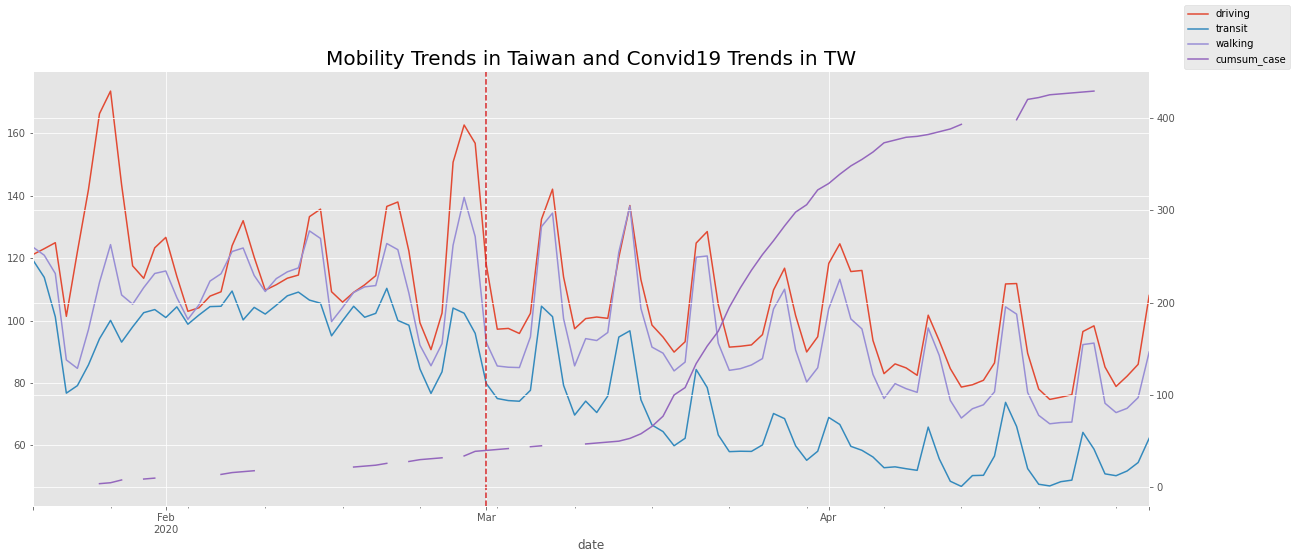

In [ ]:
#政策生效日期
POLICY_DATE = '2020-03-01'


#畫出單邊軸
ax = split_df.plot( y=['driving', 'transit', 'walking'], legend=False,figsize=(20,8))
ax2 = ax.twinx()
#補上雙邊軸
split_df.plot(y="cumsum_case", ax=ax2, legend=False, color=colors[4])

#一些畫圖設置
ax.figure.legend()
ax.set_xlabel('date')
ax.set_title('Mobility Trends in Taiwan and Convid19 Trends in TW' , fontsize= 20)

#標註出政策生效日期
ax.axvline(POLICY_DATE , color = colors[3] ,  linestyle='--')
plt.show()

哦，可以看到social distance似乎有下降，但是還是不太明顯，原因手機移動的週期性不好觀察，也許畫出均線會好一點，我們使用平移的方法來描繪出移動距離的變化。

Text(0.5, 1.0, '20 days moving average')

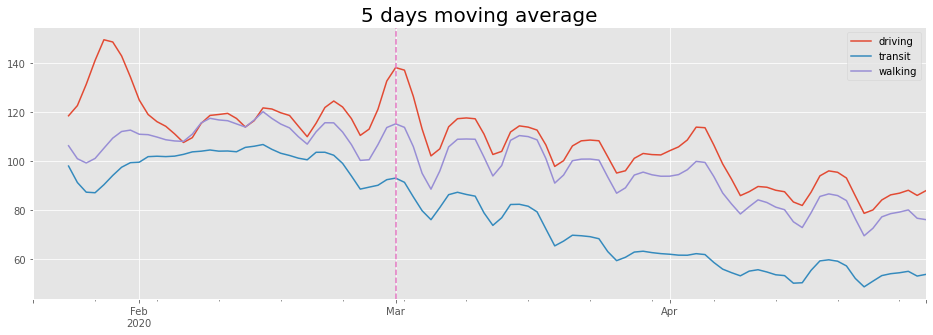

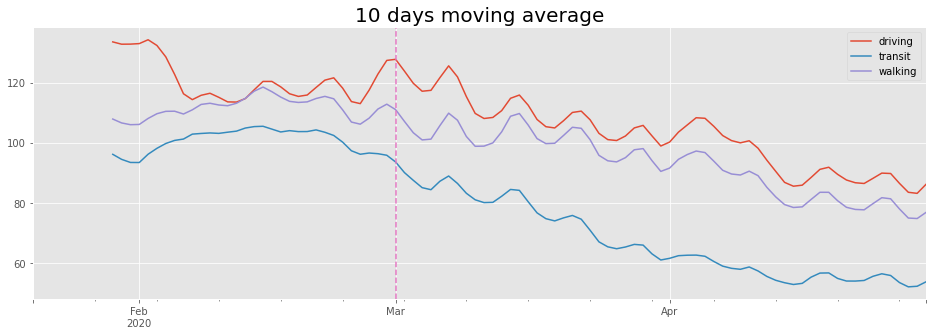

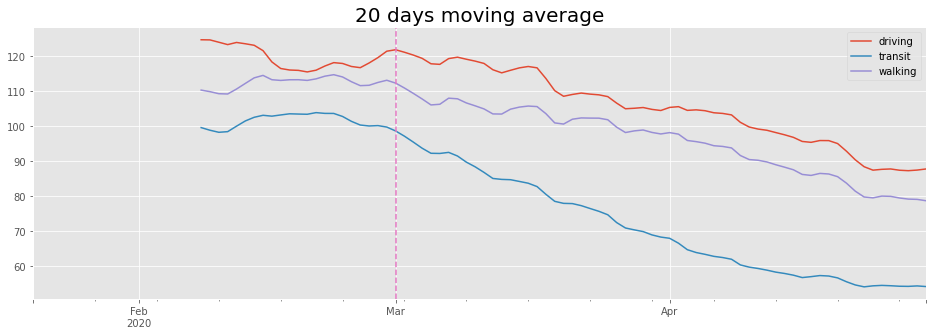

In [ ]:
ax = split_df[['driving', 'transit', 'walking']].rolling(5).mean().plot(figsize=  (16,5))
#標註出政策生效日期
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('5 days moving average' , fontsize= 20)

ax = split_df[['driving', 'transit', 'walking']].rolling(10).mean().plot(figsize=  (16,5))
#標註出政策生效日期
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('10 days moving average' , fontsize= 20)


ax = split_df[['driving', 'transit', 'walking']].rolling(20).mean().plot(figsize=  (16,5))
#標註出政策生效日期
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('20 days moving average' , fontsize= 20)

我們可以看到人們真的從大概3/1開始減少了許多移動距離，政策生效，並且transit(大眾運輸)下降得最多，表示人們也減少了許多搭乘大眾交通運輸工具的機會

,driving,transit,walking
2020-03-01,118.04,79.84,93.01


,driving,transit,walking
2020-04-24,96.47,64.15,92.28


,driving,transit,walking
2020-04-24,-21.57,-15.69,-0.73


Text(0.5, 1.0, 'Cycle trends')

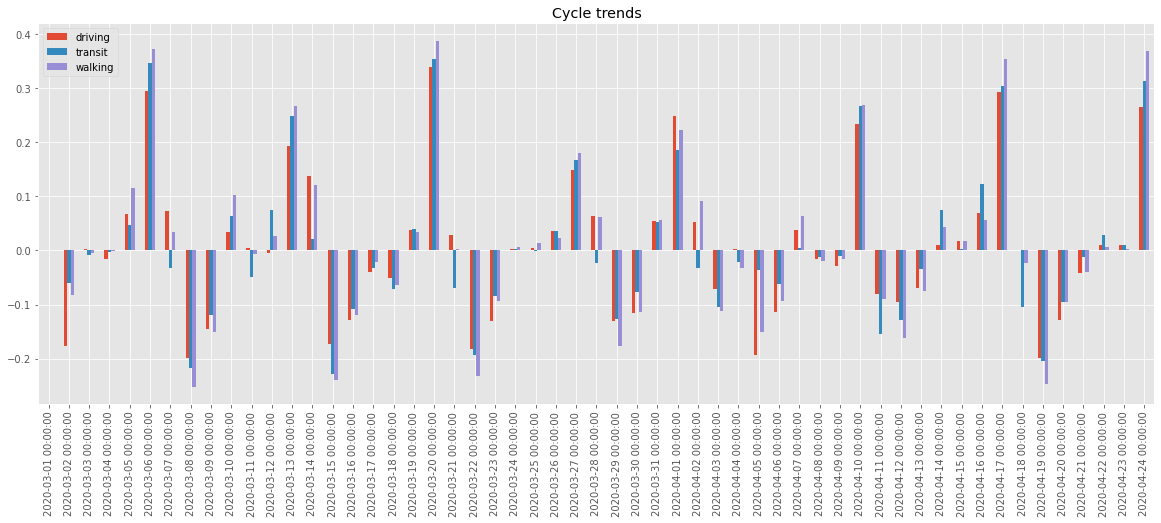

In [ ]:
observe_period = all_df[['driving', 'transit', 'walking']].loc['2020-03-01' : '2020-04-24']

first_date = observe_period.head(1)
last_date = observe_period.tail(1)
display(first_date , last_date)

display(np.subtract(last_date,first_date))
observe_period.pct_change().plot(kind = 'bar' , figsize = (20,7))
plt.title('Cycle trends')

,driving,transit,walking
2020-04-01,118.3,68.93,103.8


,driving,transit,walking
2020-04-24,96.47,64.15,92.28


,driving,transit,walking
2020-04-24,-21.83,-4.78,-11.52


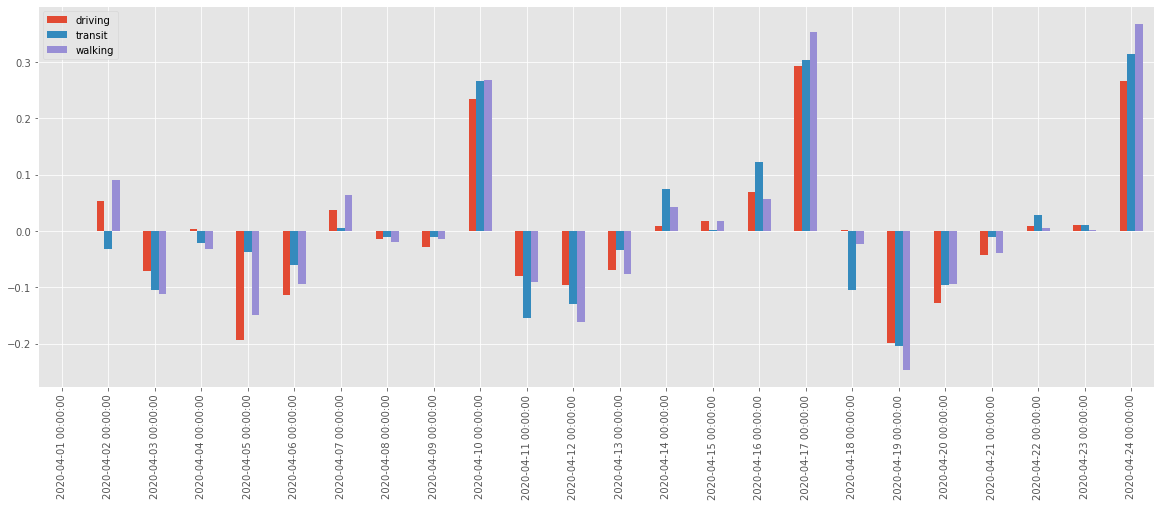

In [ ]:
#交通運輸更嚴格
POLICY_DATE = '2020-04-04'

#選出觀察的時間範圍
observe_period = split_df[['driving', 'transit', 'walking']].loc['2020-04-01' : '2020-04-24']


first_date = observe_period.head(1)
last_date = observe_period.tail(1)
display(first_date , last_date)

display(np.subtract(last_date,first_date))
observe_period.pct_change().plot(kind = 'bar' , figsize = (20,7))

### 觀察差值

,driving,transit,walking
2020-04-01,118.3,68.93,103.8
2020-04-02,124.58,66.68,113.22
2020-04-03,115.7,59.67,100.51


,driving,transit,walking
2020-04-20,-11.49,-5.01,-7.31
2020-04-21,-3.31,-0.54,-2.71
2020-04-22,0.71,1.36,0.4
2020-04-23,0.81,0.5,0.15
2020-04-24,20.24,15.31,24.83


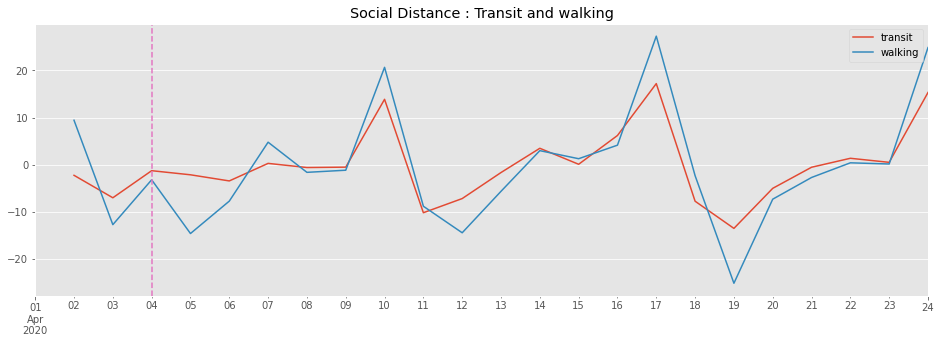

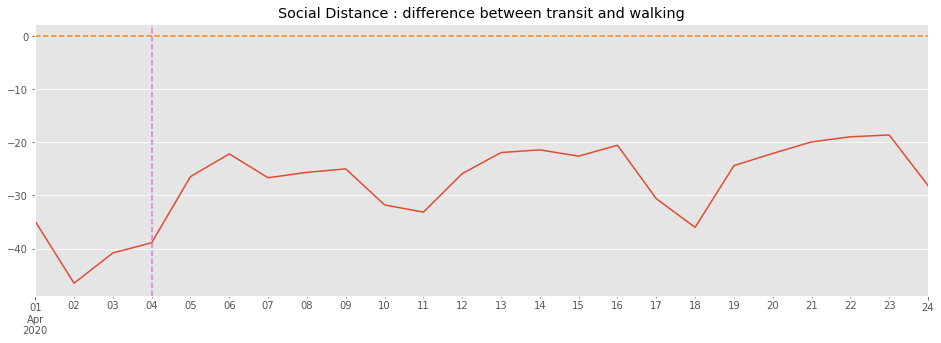

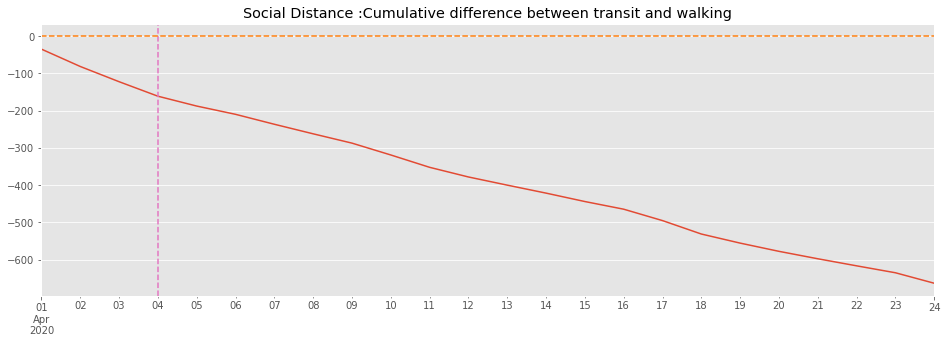

In [ ]:
display(observe_period.head(3))


#我們做差值來看看
display( observe_period.diff().tail())
ax = observe_period.diff()[['transit', 'walking']].plot(figsize=(16,5))
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('Social Distance : Transit and walking')
plt.show()

#計算差值
diff = observe_period['transit'] - observe_period['walking']
#我們做差值來看看
ax = diff.plot(figsize=  (16,5))
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.axhline(0 , color = colors[1] , linestyle = '--')
ax.set_title('Social Distance : difference between transit and walking')
plt.show()


#累積差值觀察
ax = diff.cumsum().plot(figsize=  (16,5))
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('Social Distance :Cumulative difference between transit and walking')
ax.axhline(0 , color = colors[1] , linestyle = '--')

### 4/1 Social Distance : 宣導社交距離能否減緩疫情呢？
社交距離：美國麻省理工學院（MIT）一項報告指出，由於新冠肺炎傳染力極強，社交距離2公尺並不能完全阻隔傳播，建議若必要的話，最好能相隔 8 公尺。不過每種移動方式的社交距離其實都不相同，舉例來說，搭乘大眾運輸工具無法拉開彼此的距離，就須全程佩戴口罩。因此在台灣搭乘大眾運輸工具，除了要量體溫，也要求必須戴口罩，才能進站和搭車；在餐廳吃飯時無法戴口罩，就需要用隔屏隔開。指揮中心甚至明文建議，朋友或情侶面對面交談時也需佩戴口罩。

這份「社交距離注意事項」是分別就餐廳、校園或辦公室、大眾運輸、賣場或其他營業場所、排隊人龍、特殊機構(如長照機構、監獄等)及其他特定場所等不同情境，提供維持社交距離的個別規範。建議民眾在防疫期間，務必遵守，以降低小區感染與傳播的機會，保護自己也保護他人。官方表示，相信國人的水平及自律精神，初期以柔性建議為主，暫時不會制訂罰則。

Policy Date : 中央流行疫情指揮中心3月31日宣布「社交距離指引」的原則，強調室外應保持1公尺、室內應為1.5公尺

ok , 搭乘交通運輸工具跟走路本身差距就持續在拉大，看起來不是因為交通運輸工具口罩政策的關係。統計上要確認這點可以做時間序列的結構變化 (structural break) 檢定，確定在實驗開始前後兩組差值有顯著變化。 不過在這邊我覺得蠻明顯的是差距持續在擴大。當然，我們也可以看看不同城市之間的執行效果。

那麼4/1的政策變化呢？宣導社交距離對疫情有放緩效果嗎？

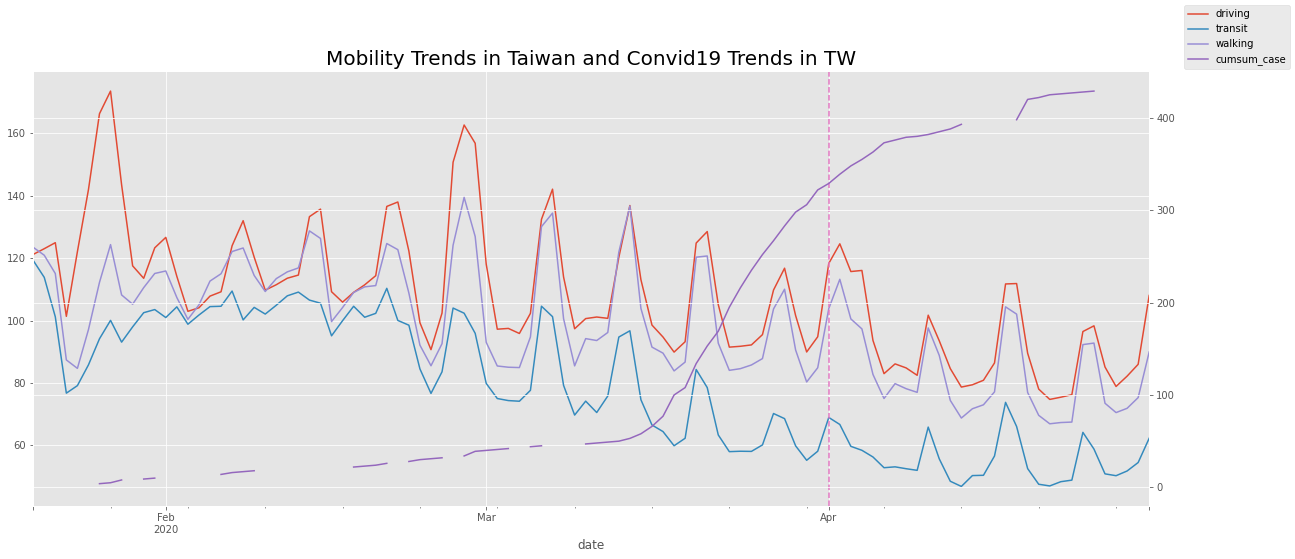

In [ ]:
#政策生效日期
POLICY_DATE = '2020-04-01'


#畫出單邊軸
ax = split_df.plot( y=['driving', 'transit', 'walking'], legend=False,figsize=(20,8))
ax2 = ax.twinx()
#補上雙邊軸
split_df.plot(y="cumsum_case", ax=ax2, legend=False, color=colors[4])


#一些畫圖設置
ax.figure.legend()
ax.set_xlabel('date')
ax.set_title('Mobility Trends in Taiwan and Convid19 Trends in TW' , fontsize= 20)

#標註出政策生效日期
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
plt.show()

### 我們可以畫出差分後的數據來看看效果

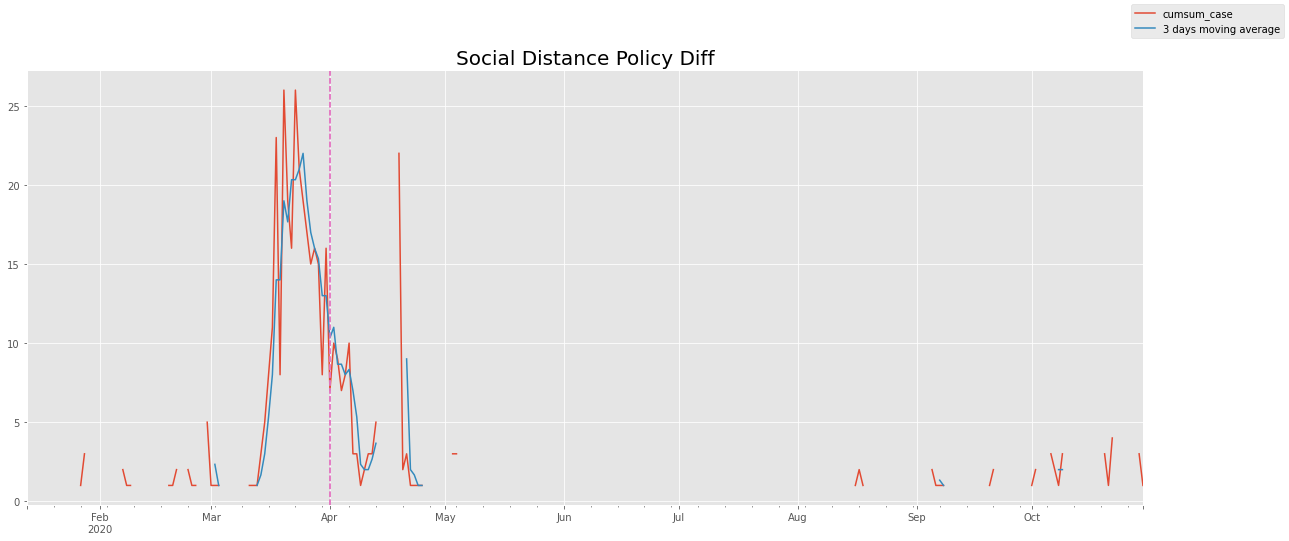

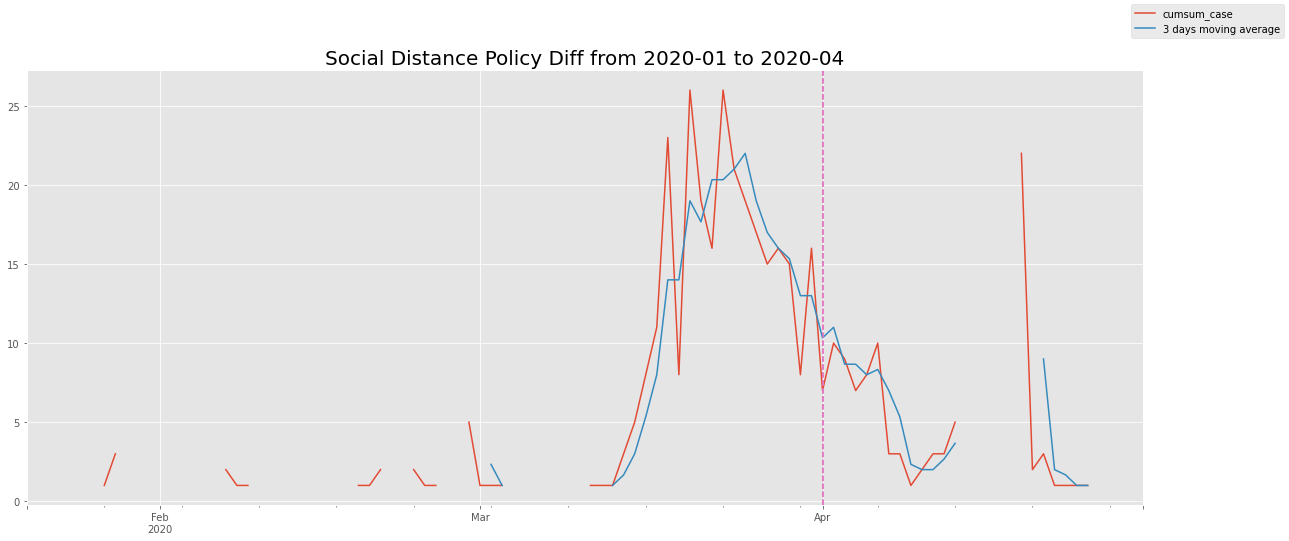

In [ ]:
ax = all_df.cumsum_case.diff().plot(figsize = (20,8))
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')



ax = all_df.cumsum_case.diff().rolling(3).mean().plot(figsize = (20,8) , label = '3 days moving average')
ax.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax.set_title('Social Distance Policy Diff' , fontsize = 20)
ax.figure.legend()

plt.show()

ax_split = split_df.cumsum_case.diff().plot(figsize = (20,8))
ax_split.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')



ax_split = split_df.cumsum_case.diff().rolling(3).mean().plot(figsize = (20,8) , label = '3 days moving average')
ax_split.axvline(POLICY_DATE , color = colors[6] ,  linestyle='--')
ax_split.set_title('Social Distance Policy Diff from 2020-01 to 2020-04' , fontsize = 20)
ax_split.figure.legend()

In [ ]:
df2 = df[df.ImportOrNot == '是']
# 境外移入
cumsum_confirmed_case_import = df2.groupby('Date')['CountOfConfirmed'].sum().cumsum()

print(cumsum_confirmed_case_import)
all_df_import = tw_apple_df.copy()
# #透過map(映射)將apple , 確診資料合併在一起
all_df_import['cumsum_case'] = tw_apple_df.index.map(cumsum_confirmed_case)
all_df_import['cumsum_case_import'] = tw_apple_df.index.map(cumsum_confirmed_case_import)
# #看看資料表現在的樣子
display(all_df_import.describe())
all_df_import.tail()

Date
2020-01-22      1
2020-01-24      3
2020-01-26      4
2020-01-27      5
2020-01-28      7
             ... 
2020-10-24    494
2020-10-28    495
2020-10-29    498
2020-10-30    499
2020-10-31    500
Name: CountOfConfirmed, Length: 126, dtype: int64


,cumsum_case,cumsum_case_import
count,140.000000,125.000000
mean,328.592857,316.264000
std,197.451894,164.629405
min,1.000000,1.000000
25%,74.250000,227.000000
50%,427.500000,386.000000
75%,488.250000,438.000000
max,554.000000,499.000000


,driving,transit,walking,cumsum_case,cumsum_case_import
2020-10-26,95.15,67.44,95.26,NaN,NaN
2020-10-27,94.31,70.3,95.55,NaN,NaN
2020-10-28,92.57,67.05,94.08,550.0,495.0
2020-10-29,98.55,73.93,100.3,553.0,498.0
2020-10-30,128.35,110.68,144.89,554.0,499.0
